# RHLF 
Source: https://www.youtube.com/watch?v=qGyFrqc34yc

RHLF is used to align the behavior of a language model in a way we want it to behave!

# Language Model
a probabilistice model that assing probabilities to sequences of words. P(Next token | Previous tokens). 
To generate a complete answer to a prompt, a language model is iteratively queried by adding the previously chosen token to the input. 
By just pre-training we do not teach the model not to use offensive language or harmful content. The goal of AI alignment is to align the model behavior with certain behavior that we want it to have.


# RL & Language Models
Language model could be considered as a policy itself. The prompt is the state and the next token is the aciotn. The missing part is the reward function. How can we reward the language model for good responses and how can we penalize the model for bad responses?

# Reward Modeling
It's not easy to come up with a number that can be accepted by everyone! However, we as humans are very good at comparing :D

Right now we can use a high temperature LM to generate multiple (two) responses to a given prompt. Then we can ask humans to compare the two responses and choose the better one. We can then generate a model that can generate the numeric reward for a given prompt and response pair. This is called reward modeling.

A neural network taking as input the prompt and the response and outputting a scalar reward. The preferred response should get a higher reward.


![Screenshot 2025-11-04 at 12.39.44 PM.png](<attachment:Screenshot 2025-11-04 at 12.39.44 PM.png>)

## Reward model loss
Our dataset is made up of questions and possible answers. Suppose there are only two answers! A good and a bad one.
We feed the question along with the answer to the model. We do this for both answers and get two scalar reward. 

Let's assume that model assinged high reward to the good one and low reward to the bad one --> We'll get small loss
Now let's assume that the model gave high reward to the bad response and low reward to the good response --> We'll get big loss

![Screenshot 2025-11-04 at 12.45.24 PM.png](<attachment:Screenshot 2025-11-04 at 12.45.24 PM.png>)



# RL

The expected return of a policy is the expected return over all possible trajectories! 

$\mathcal{J}(\pi) = \int_{\tau} p(\tau|\pi) R(\tau) = E_{\tau \sim p(\tau|\pi)}[R(\tau)]$

A trajectory is a series of actions and states, starting from an initial state. 

$ \tau = (s_0, a_0, s_1, a_1, ..., s_T, a_T)$

We wil model the next state as being stochastic 

$ s_{t+1} \sim P(s_{t+1}|s_t, a_t)$

We can define the probability of a trajectory given a policy as

$ p(\tau|\pi) = p(s_0) \prod_{t=0}^{T} \pi(a_t|s_t) P(s_{t+1}|s_t, a_t)$


![Screenshot 2025-11-04 at 1.03.33 PM.png](<attachment:Screenshot 2025-11-04 at 1.03.33 PM.png>)


We always work with the discounted reward : 
$ R(\tau) = \sum_{t=0}^{T} \gamma^t r(s_t, a_t)$

So let's assume that in the case of the cat example. The cat goes to the left and then goes down. For this specific trajectory the discounted reward will be : 


$ R(\tau) = \gamma *(-1) + \gamma^8 * (100)$ where $ 0 <\gamma< 1$ 


## Trajectory in Language Models

![Screenshot 2025-11-04 at 1.56.40 PM.png](<attachment:Screenshot 2025-11-04 at 1.56.40 PM.png>)


Now imagine that we have a policy. Our goal is to optimize the policy to maximize the expected return according to some reward model that we have developed previously! Since we want to maximze the expected return, we should use gradient ascent instead of descent!

$ \mathcal{J}(\pi_{\theta}) = E_{\tau \sim \pi_{\theta}}[R(\tau)]$

$ \theta_{k+1} = \theta_k + \alpha \nabla_{\theta} \mathcal{J}(\pi_{\theta}) |_{\theta = \theta_k}$


The gradiet of the policy is known as policy gradient and the algorithm is called policy gradient algorihm :D


Now the problem is how to compute the gradient of the expected return? We'd need to evaluate it over all the possible trajectories, which is computationally intractable!


![Screenshot 2025-11-04 at 2.09.51 PM.png](<attachment:Screenshot 2025-11-04 at 2.09.51 PM.png>)


We still have the expectation over all the possible trajectories and still intractable! One way to calculate this expectation is to approximate it with a sample mean by collecting a set D of trajectories.

$ \hat g = \frac{1}{|D|} \sum_{\tau \in D} \sum_{t=0}^{T} \nabla_{\theta} log \pi_{\theta}(a_t|s_t) R(\tau)$

loss.backward() in pytorch will automatically calculate the $\nabla_{\theta} log \pi_{\theta}(a_t|s_t)$ part for us :D

This whole process is called REINFORCE algorithm. Now let's check Reinforce on the language model!

![Screenshot 2025-11-04 at 2.43.09 PM.png](<attachment:Screenshot 2025-11-04 at 2.43.09 PM.png>)

so far we now how to calculatethe log probabilities. We need to understand how to calculatet reward model
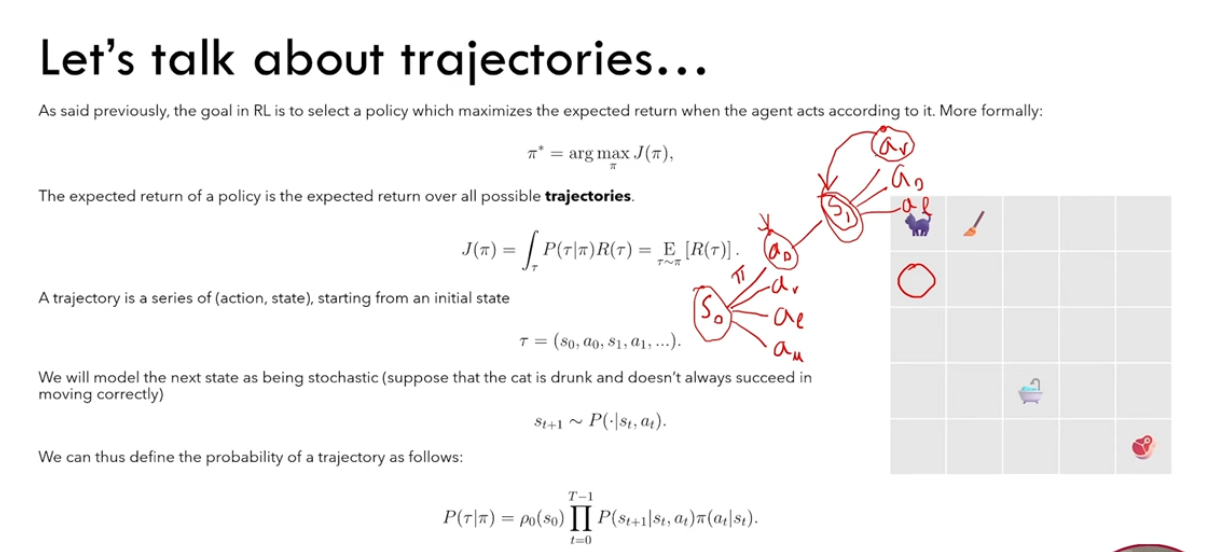
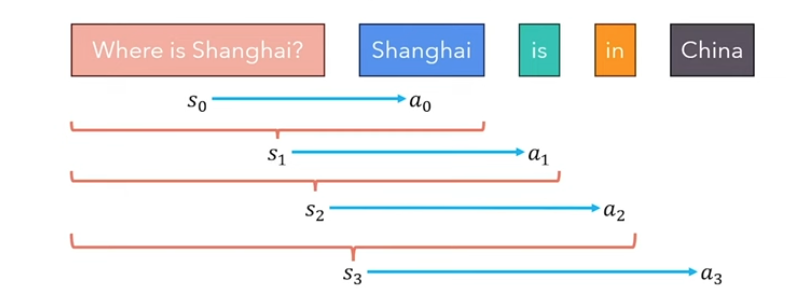
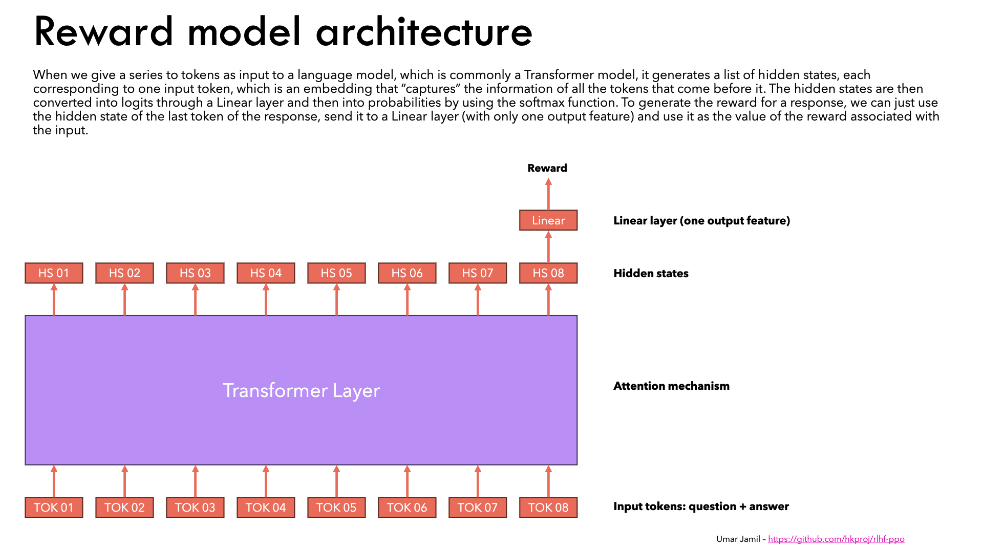
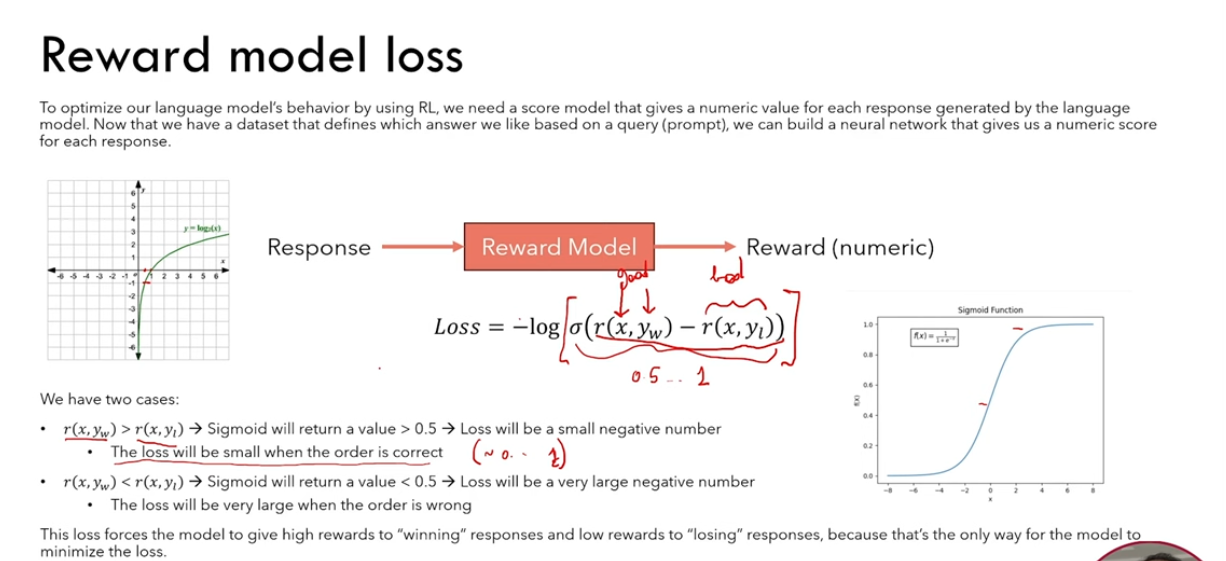
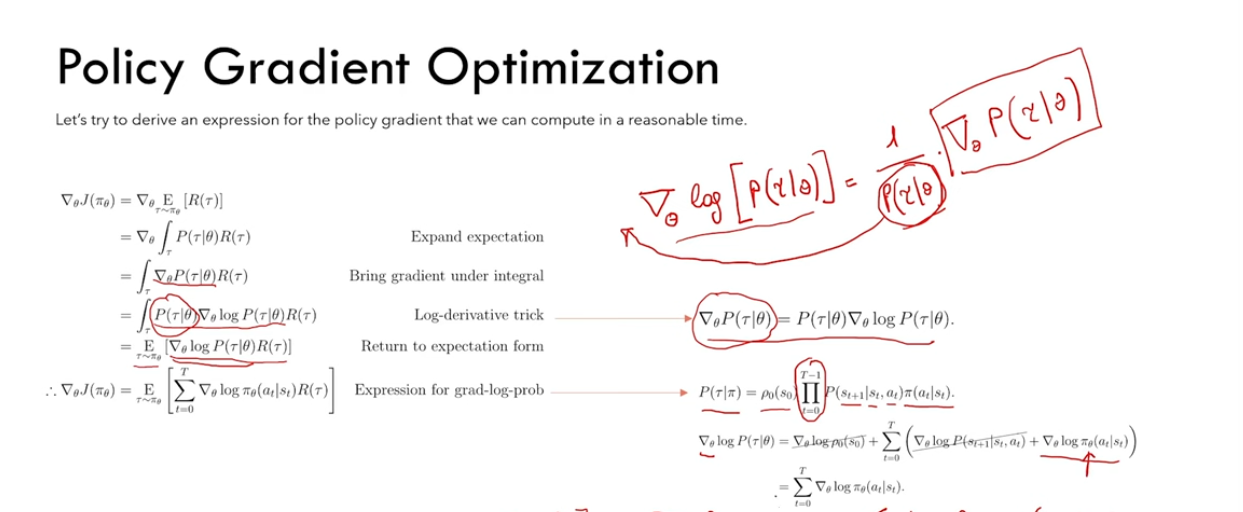
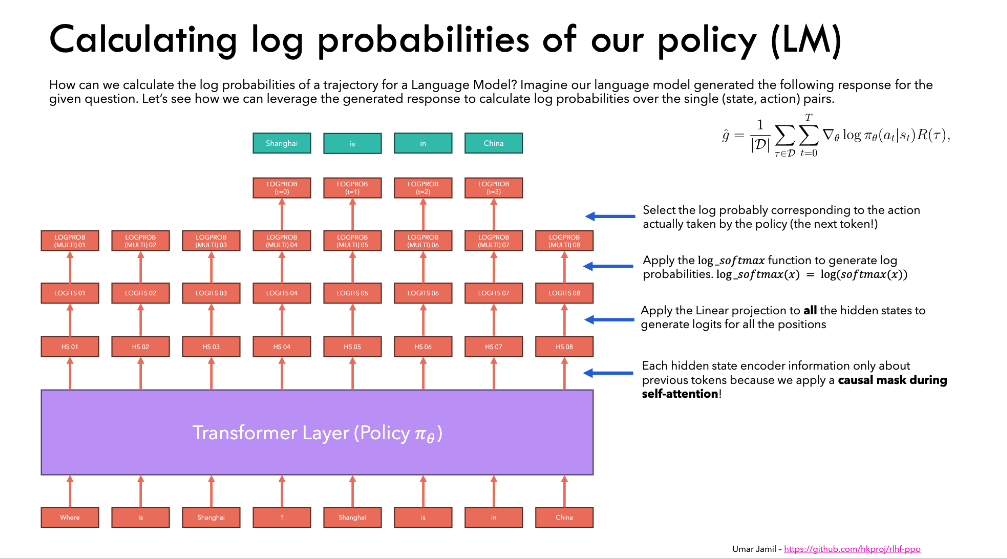